# Creating and Visualizing DataFrames

## Which avocado size is most popular?

Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. In this exercise, you'll use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but you'll often have to manipulate your data first in order to get the numbers you need for plotting.

In [9]:
import pandas as pd
avocados = pd.read_pickle('dataset/avoplotto.pkl')

import matplotlib.pyplot as plt

### Instructions
- Print the head of the `avocados` dataset. What columns are available?
- For each avocado size group, calculate the total number sold, storing as `nb_sold_by_size`.
- Create a bar plot of the number of avocados sold by size.
- Show the plot.

In [3]:
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [8]:
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()
nb_sold_by_size

size
extra_large    1.561752e+08
large          2.015012e+09
small          2.054936e+09
Name: nb_sold, dtype: float64

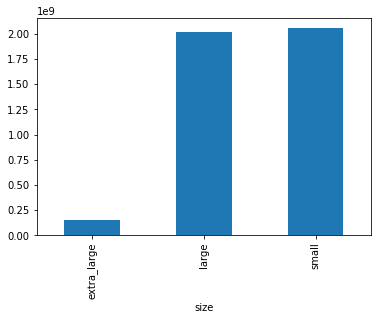

In [10]:
nb_sold_by_size.plot(kind = 'bar')
plt.show()

## Changes in sales over time

Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing the change in a number over time since each time point is naturally connected to the next time point. In this exercise, you'll visualize the change in avocado sales over three years.

### Instructions

- Get the total number of avocados sold on each date. The DataFrame has two rows for each date -- one for organic, and one for conventional. Save this as `nb_sold_by_date`.
- Create a line plot of the number of avocados sold.
- Show the plot.

In [11]:
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()
nb_sold_by_date

date
2015-01-04    27279606.03
2015-01-11    25081927.33
2015-01-18    24961540.48
2015-01-25    24094678.66
2015-02-01    39838734.08
                 ...     
2018-02-25    25434002.74
2018-03-04    26834303.05
2018-03-11    26094044.41
2018-03-18    26030618.97
2018-03-25    27480242.92
Name: nb_sold, Length: 169, dtype: float64

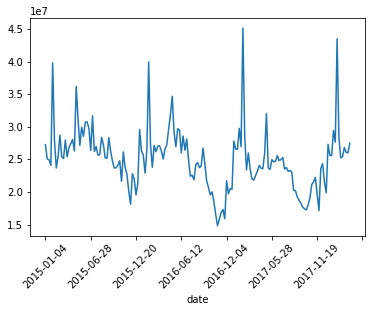

In [12]:
nb_sold_by_date.plot(x='date',y='nb_sold',rot = 45)
plt.show()

## Avocado supply and demand

Scatter plots are ideal for visualizing relationships between numerical variables. In this exercise, you'll compare the number of avocados sold to average price and see if they're at all related. If they're related, you may be able to use one number to predict the other.

### Instructions
- Create a scatter plot with `nb_sold` on the x-axis and `avg_price` on the y-axis. Title it `"Number of avocados sold vs. average price"`.
- Show the plot.

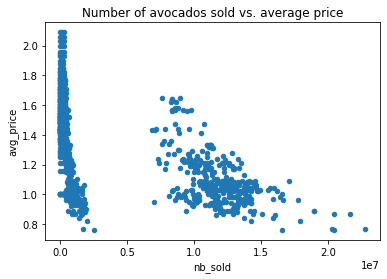

In [14]:
avocados.plot(x='nb_sold',y='avg_price', kind='scatter', title='Number of avocados sold vs. average price')
plt.show()

## Price of conventional vs. organic avocados

Creating multiple plots for different subsets of data allows you to compare groups. In this exercise, you'll create multiple histograms to compare the prices of conventional and organic avocados.

### Instructions 1/3
- Subset avocados for the conventional `type`, and the average price column. Create a histogram.
- Create a histogram of `avg_price` for organic type avocados.
- Add a `legend` to your plot, with the names "conventional" and "organic".
- Show your plot.

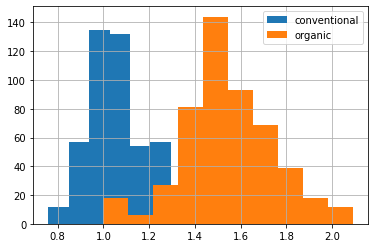

In [15]:
avocados[avocados['type'] == 'conventional']['avg_price'].hist()
avocados[avocados['type'] == 'organic']['avg_price'].hist()
plt.legend(['conventional','organic'])
plt.show()

### Instructions 2/3
- Modify your code to adjust the transparency of both histograms to `0.5` to see how much overlap there is between the two distributions.

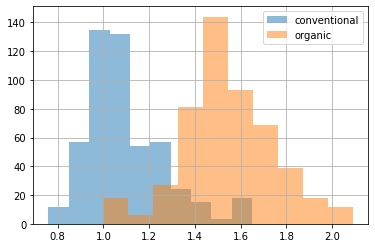

In [17]:
avocados[avocados['type'] == 'conventional']['avg_price'].hist(alpha=0.5)
avocados[avocados['type'] == 'organic']['avg_price'].hist(alpha=0.5)
plt.legend(['conventional','organic'])
plt.show()

### Instructions 3/3
- Modify your code to use 20 bins in both histograms.

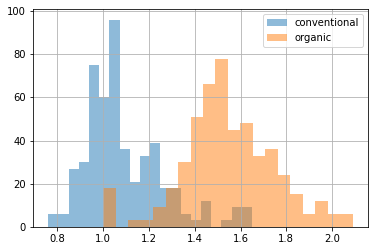

In [18]:
avocados[avocados['type'] == 'conventional']['avg_price'].hist(alpha=0.5, bins=20)
avocados[avocados['type'] == 'organic']['avg_price'].hist(alpha=0.5, bins=20)
plt.legend(['conventional','organic'])
plt.show()

## Finding missing values

Missing values are everywhere, and you don't want them interfering with your work. Some functions ignore missing data by default, but that's not always the behavior you might want. Some functions can't handle missing values at all, so these values need to be taken care of before you can use them. If you don't know where your missing values are, or if they exist, you could make mistakes in your analysis. In this exercise, you'll determine if there are missing values in the dataset, and if so, how many.

pandas has been imported as pd and `avocados_2016`, a subset of avocados that contains only sales from 2016, is available.

In [45]:
avocados_2016 = pd.read_excel('dataset/avocados_2016.xls','avocados_2016',index_col=None)
avocados_2016.to_csv('dataset/avocados_2016.csv')

In [52]:
avocados_2016 = pd.read_csv('dataset/avocados_2016.csv',index_col=0, parse_dates=['date'])
avocados_2016.head(3)

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,2016-12-25,1.00,30290000000,9.255000e+09,1.028000e+10,542000000.0,10210000000,7710000000,2417000000,81101.22
1,2016-12-18,0.96,29580000000,9.394000e+09,1.034000e+10,427900000.0,9423000000,6970000000,2358000000,94011.78
2,2016-12-11,0.98,30090000000,9.010000e+09,NaN,403000000.0,10710000000,8149000000,2490000000,73342.82


In [53]:
avocados_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             52 non-null     datetime64[ns]
 1   avg_price        52 non-null     float64       
 2   total_sold       52 non-null     int64         
 3   small_sold       46 non-null     float64       
 4   large_sold       46 non-null     float64       
 5   xl_sold          48 non-null     float64       
 6   total_bags_sold  52 non-null     int64         
 7   small_bags_sold  52 non-null     int64         
 8   large_bags_sold  52 non-null     int64         
 9   xl_bags_sold     52 non-null     float64       
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 4.5 KB


### Instructions
- Print a DataFrame that shows whether each value in avocados_2016 is missing or not.
- Print a summary that shows whether any value in each column is missing or not.
- Create a bar plot of the total number of missing values in each column.

In [54]:
avocados_2016.isna()

,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [59]:
avocados_2016.isna().any()

date               False
avg_price          False
total_sold         False
small_sold          True
large_sold          True
xl_sold             True
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool

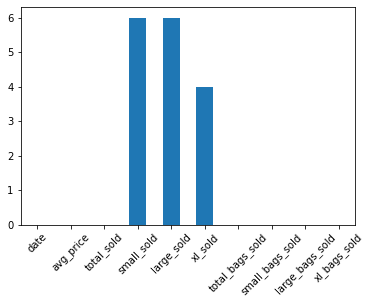

In [56]:
avocados_2016.isna().sum().plot(kind='bar',rot=45)
plt.show()

## Removing missing values

Now that you know there are some missing values in your DataFrame, you have a few options to deal with them. One way is to remove them from the dataset completely. In this exercise, you'll remove missing values by removing all rows that contain missing values.

### Instructions
- Remove the rows of `avocados_2016` that contain missing values and store the remaining rows in `avocados_complete`.
- Verify that all missing values have been removed from `avocados_complete`. Calculate each column that has NAs and print.

In [60]:
avocados_complete = avocados_2016.dropna()
avocados_complete.isna().any()

date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool

## Replacing missing values

Another way of handling missing values is to replace them all with the same value. For numerical variables, one option is to replace values with 0— you'll do this here. However, when you replace missing values, you make assumptions about what a missing value means. In this case, you will assume that a missing number sold means that no sales for that avocado type were made that week.

In this exercise, you'll see how replacing missing values can affect the distribution of a variable using histograms. You can plot histograms for multiple variables at a time as follows:
```Python
dogs[["height_cm", "weight_kg"]].hist()
```

### Instructions 1/2
- A list has been created, `cols_with_missing`, containing the names of columns with missing values: `"small_sold"`, `"large_sold"`, and `"xl_sold"`.
- Create a histogram of those columns.
- Show the plot.

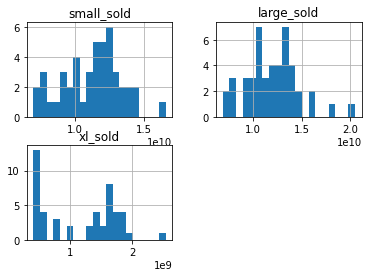

In [63]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

avocados_2016[cols_with_missing].hist(bins = 20)
plt.show()

### Instructions 2/2
- Replace the missing values of `avocados_2016` with `0s` and store the result as `avocados_filled`.
- Create a histogram of the `cols_with_missing` columns of `avocados_filled`.

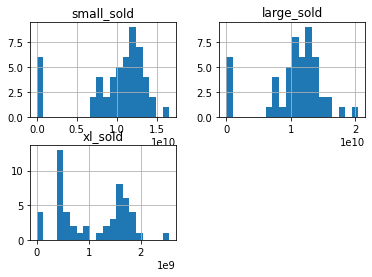

In [65]:
avocados_filled = avocados_2016.fillna(0)
avocados_filled[cols_with_missing].hist(bins=20)
plt.show()

## List of dictionaries

You recently got some new avocado data from 2019 that you'd like to put in a DataFrame using the list of dictionaries method. Remember that with this method, you go through the data row by row.

|date|small_sold|large_sold|
|---|---|---|
|"2019-11-03"|10376832|7835071|
|"2019-11-10"|10717154|8561348|


### Instructions
- Create a list of dictionaries with the new data called `avocados_list`.
- Convert the list into a DataFrame called `avocados_2019`.
- Print your new DataFrame.

In [66]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': '2019-11-03', 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': '2019-11-10', 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
avocados_2019

,date,small_sold,large_sold
0,2019-11-03,10376832,7835071
1,2019-11-10,10717154,8561348


## Dictionary of lists

Some more data just came in! This time, you'll use the dictionary of lists method, parsing the data column by column.

|date|small_sold|large_sold|
|---|---|---|
|"2019-11-17"|10859987|7674135|
|"2019-12-01"|9291631|6238096|

### Instructions
- Create a dictionary of lists with the new data called `avocados_dict`.
- Convert the dictionary to a DataFrame called `avocados_2019`.
- Print your new DataFrame.

In [67]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
avocados_2019

,date,small_sold,large_sold
0,2019-11-17,10859987,7674135
1,2019-12-01,9291631,6238096


## CSV to DataFrame

You work for an airline, and your manager has asked you to do a competitive analysis and see how often passengers flying on other airlines are involuntarily bumped from their flights. You got a CSV file (`airline_bumping.csv`) from the Department of Transportation containing data on passengers that were involuntarily denied boarding in 2016 and 2017, but it doesn't have the exact numbers you want. In order to figure this out, you'll need to get the CSV into a pandas DataFrame and do some manipulation!

pandas is imported for you as pd. `"airline_bumping.csv"` is in your working directory.

In [71]:
df = pd.read_excel('dataset/airline_bumping.xlsx', index_col=None)
df.to_csv('dataset/airline_bumping.csv')

### Instructions 1/4
- Read the CSV file `"airline_bumping.csv"` and store it as a DataFrame called `airline_bumping`.
- Print the first few rows of airline_bumping.

In [72]:
airline_bumping = pd.read_csv('dataset/airline_bumping.csv', index_col=0)
airline_bumping.head()

,airline,year,nb_bumped,total_passengers
0,DELTA AIR LINES,2017,679,99796155
1,VIRGIN AMERICA,2017,165,6090029
2,JETBLUE AIRWAYS,2017,1475,27255038
3,UNITED AIRLINES,2017,2067,70030765
4,HAWAIIAN AIRLINES,2017,92,8422734


### Instructions 2/4
- For each airline group, select the `nb_bumped`, and `total_passengers` columns, and calculate the `sum` (for both years). Store this as `airline_totals`.

In [74]:
airline_totals = airline_bumping.groupby('airline')[['nb_bumped','total_passengers']].sum()

### Instructions 3/4
- Create a new column of `airline_totals` called `bumps_per_10k`, which is the number of passengers bumped per 10,000 passengers in 2016 and 2017.

In [75]:
airline_totals['bumps_per_10k'] = airline_totals['nb_bumped']/airline_totals['total_passengers']*10000

### Instructions 4/4
- Print `airline_totals` to see the results of your manipulations.

In [77]:
airline_totals.round(3)

,nb_bumped,total_passengers,bumps_per_10k
airline,,,
ALASKA AIRLINES,1392,36543121,0.381
AMERICAN AIRLINES,11115,197365225,0.563
DELTA AIR LINES,1591,197033215,0.081
EXPRESSJET AIRLINES,3326,27858678,1.194
FRONTIER AIRLINES,1228,22954995,0.535
HAWAIIAN AIRLINES,122,16577572,0.074
JETBLUE AIRWAYS,3615,53245866,0.679
SKYWEST AIRLINES,3094,47091737,0.657
SOUTHWEST AIRLINES,18585,228142036,0.815


## DataFrame to CSV

You're almost there! To make things easier to read, you'll need to sort the data and export it to CSV so that your colleagues can read it.

### Instructions
- Sort `airline_totals` by the values of `bumps_per_10k` from highest to lowest, storing as `airline_totals_sorted`.
- Print your sorted DataFrame.
- Save the sorted DataFrame as a CSV called `"airline_totals_sorted.csv"`.

In [80]:
airline_totals_sorted = airline_totals.sort_values('bumps_per_10k', ascending = False)
airline_totals_sorted

,nb_bumped,total_passengers,bumps_per_10k
airline,,,
EXPRESSJET AIRLINES,3326,27858678,1.193883
SPIRIT AIRLINES,2920,32304571,0.903897
SOUTHWEST AIRLINES,18585,228142036,0.814624
JETBLUE AIRWAYS,3615,53245866,0.678926
SKYWEST AIRLINES,3094,47091737,0.657015
AMERICAN AIRLINES,11115,197365225,0.563169
FRONTIER AIRLINES,1228,22954995,0.534960
ALASKA AIRLINES,1392,36543121,0.380920
UNITED AIRLINES,4941,134468897,0.367446


In [81]:
airline_totals_sorted.to_csv('dataset/airline_totals_sorted.csv')